In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_breast_cancer


from adspy_shared_utilities import plot_decision_tree

### Conjunto de dados

In [18]:
iris = load_iris()

(X, y) = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

cancer = load_breast_cancer()

(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

# Árvores de Decisão

In [10]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

print(f'Acurácia do classificador por árvore de decisão no conjunto de treino: {clf.score(X_train, y_train):.2f}')
print(f'Acurácia do classificador por árvore de decisão no conjunto de teste: {clf.score(X_test, y_test):.2f}')

Acurácia do classificador por árvore de decisão no conjunto de treino: 1.00
Acurácia do classificador por árvore de decisão no conjunto de teste: 0.95


### Configurando a profundidade máxima para evitar sobreajuste

In [11]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

print(f'Acurácia do classificador por árvore de decisão no conjunto de treino: {clf2.score(X_train, y_train):.2f}')
print(f'Acurácia do classificador por árvore de decisão no conjunto de teste: {clf2.score(X_test, y_test):.2f}')

Acurácia do classificador por árvore de decisão no conjunto de treino: 0.98
Acurácia do classificador por árvore de decisão no conjunto de teste: 0.97


### Visuzalizando árvores de decisão

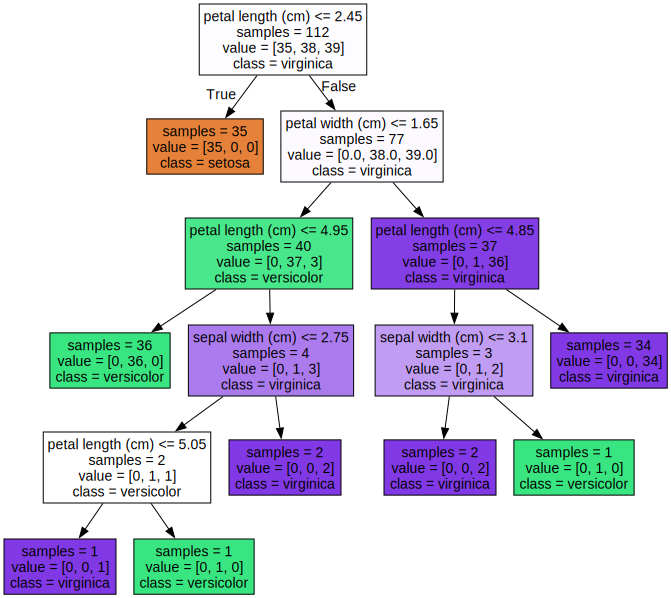

In [12]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

### Versão pré-podada (Profundidade máxima igual a 3)

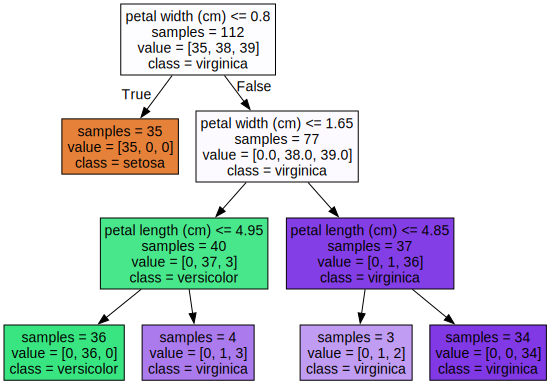

In [13]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

## Importância das características

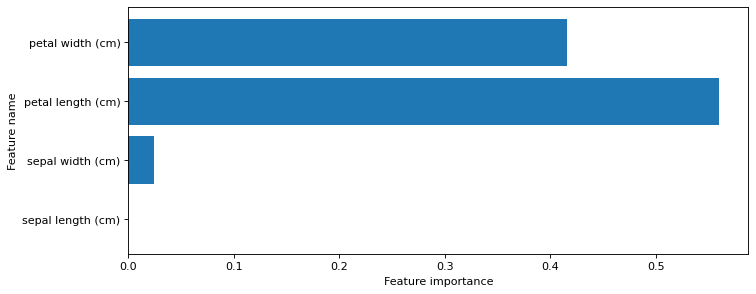

Importância das características: [0.         0.02457904 0.55984437 0.41557658]


In [14]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10, 4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print(f'Importância das características: {clf.feature_importances_}')

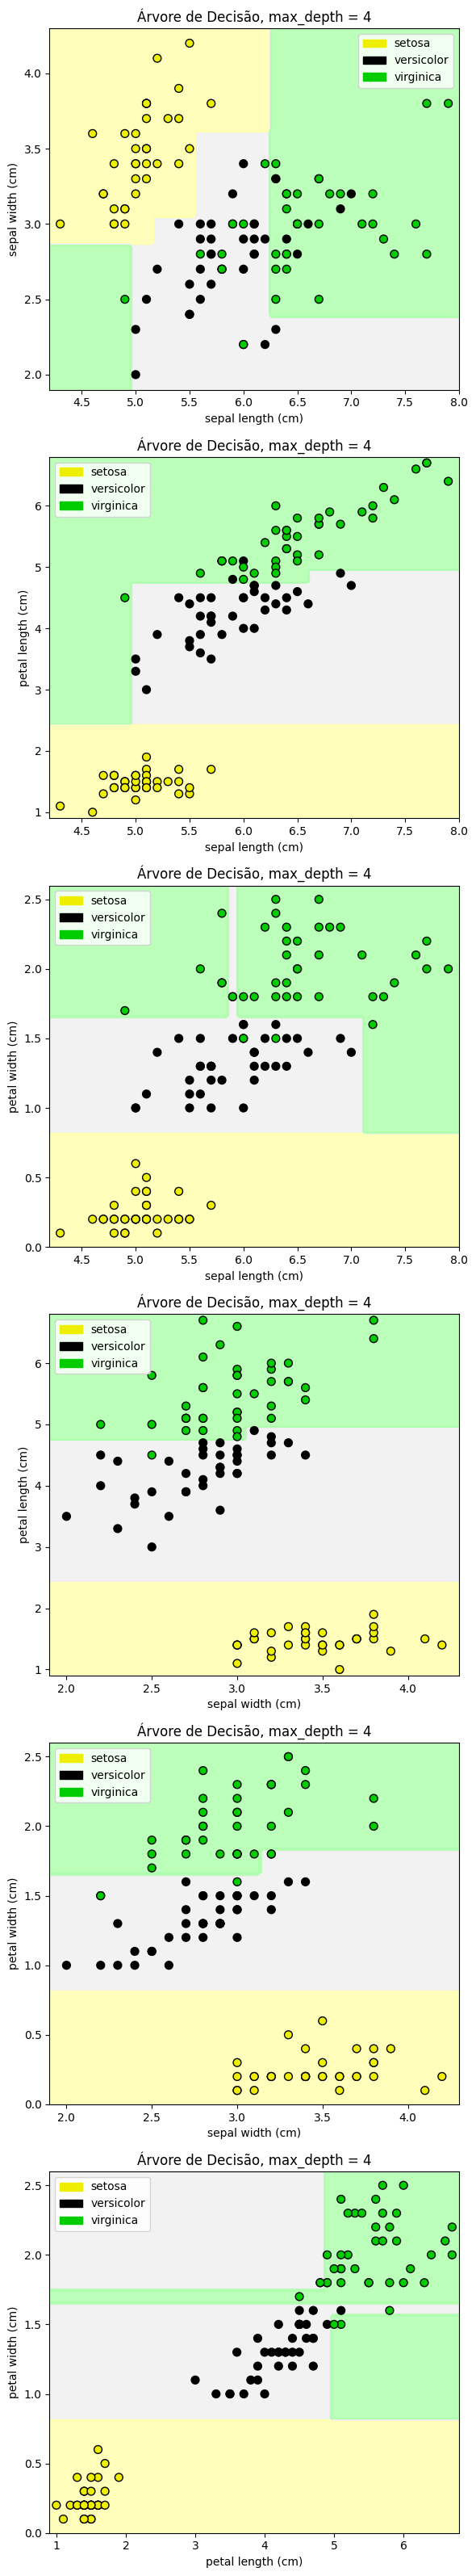

In [15]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = f'Árvore de Decisão, max_depth = {tree_max_depth:d}'
    plot_class_regions_for_classifier_subplot(clf, X, y, None, None, title, axis, iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

## Árvore de Decisão em um conjunto de dados real

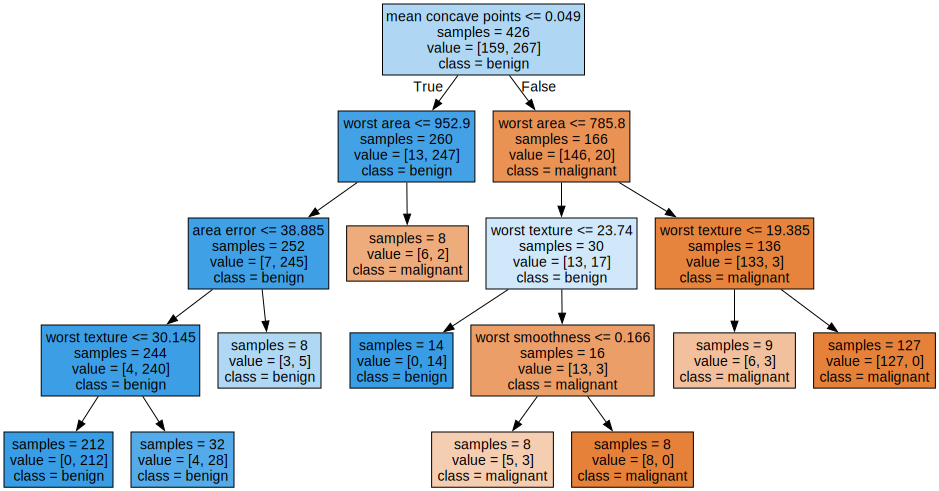

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=0)
clf.fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Conjunto de dados sobre câncer de mama: Árvore de decisão
Acurácia da árvore de decisão no conjunto de treino: 0.96
Acurácia da árvore de decisão no conjunto de teste: 0.94


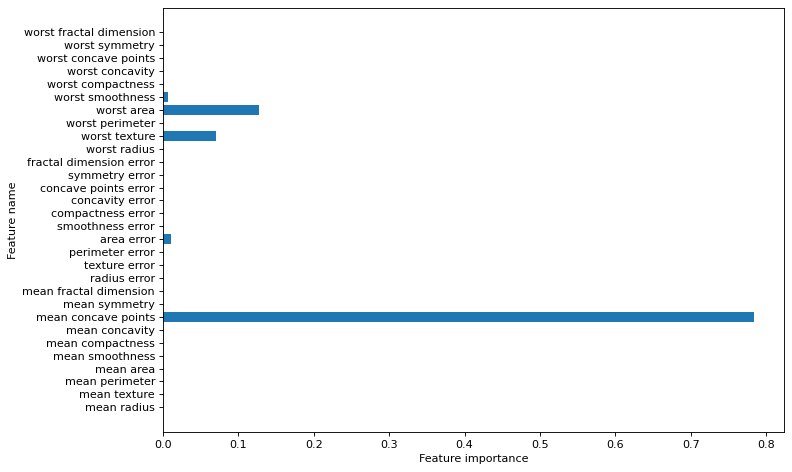

In [21]:
print('Conjunto de dados sobre câncer de mama: Árvore de decisão')
print(f'Acurácia da árvore de decisão no conjunto de treino: {clf.score(X_train, y_train):.2f}')
print(f'Acurácia da árvore de decisão no conjunto de teste: {clf.score(X_test, y_test):.2f}')

plt.figure(figsize=(10, 6), dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()